## Course: CSCE 5215 Machine Learning
## Professor: Zeenat Tariq
## Activity 5



*   The SVM (Support Vector Machine) is a supervised machine learning algorithm typically used for binary classification problems.


* SVm model trained by feeding a dataset with labeled examples (xᵢ, yᵢ).
 xᵢ --> Represents feature vector [contains feature set like mean radius, mean texture, mean perimeter, mean area for breast cancer dataset]
 yᵢ --> Represents the label [Benign, Malignant]

Import libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score
from IPython.display import Image

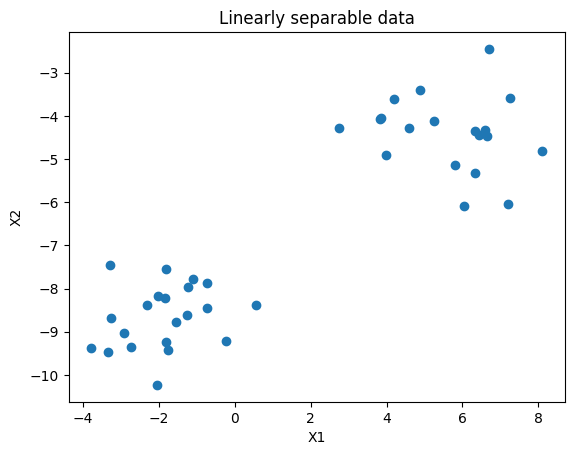

In [2]:

X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
# n_samples=50 --> Number of records/samples
# n_features=2  --> Number of Features
# centers=2     --> This parameter defines the number of clusters or blobs to be generated.
# cluster_std=1.05 --> It determines the standard deviation of each cluster or blob. The higher the value, the more scattered the points within each blob.
# random_state=40  --> This parameter sets the random seed for the random number generator. It ensures that the generated dataset is reproducible.
y = np.where(y == 0, -1, 1) # Replace 0 with -1
#Split the data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
# Generate scatter plot for training data
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Steps:

Training

*   Initialize weights
*   Apply Update Rule for n_iters

Predict

* Calculate y= Sign(w.x-b)


In [3]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize weights
        self.w = np.zeros(n_features)
        self.b = 0
        # Stochastic Gradient Descent or SGD method
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [4]:
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 1.0


Visualizing the hyperplane that seperates the two classes.

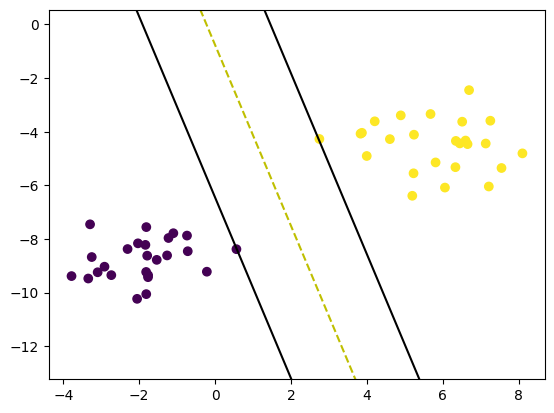

In [5]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

visualize_svm()


### Loading Data


In [6]:
#Load dataset
breast_cancer = datasets.load_breast_cancer()

In [7]:
# Split the dataset into features (X) and target variable (y)
X = breast_cancer.data
y = breast_cancer.target

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [9]:
from sklearn.svm import SVC
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
Image(url="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*KsO48nIV0ohZzQ_ZPstoOA.png")

### SVM Kernels
The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

* **Linear Kernel** : A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
                  K(x, xi) = sum(x * xi)
*  **Polynomial** : Kernel A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
                  K(x,xi) = 1 + sum(x * xi)^d
* **Radial Basis** : Function Kernel The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
                  K(x,xi) = exp(-gamma * sum((x – xi)^2))


### Implementation of SVM with Scikit


In [11]:
#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.956140350877193


In [12]:
clf.support_vectors_

array([[1.348e+01, 2.082e+01, 8.840e+01, ..., 2.258e-01, 2.807e-01,
        1.071e-01],
       [1.344e+01, 2.158e+01, 8.618e+01, ..., 1.112e-01, 2.994e-01,
        7.146e-02],
       [1.742e+01, 2.556e+01, 1.145e+02, ..., 1.099e-01, 1.603e-01,
        6.818e-02],
       ...,
       [1.785e+01, 1.323e+01, 1.146e+02, ..., 8.341e-02, 1.783e-01,
        5.871e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       [1.426e+01, 1.965e+01, 9.783e+01, ..., 1.505e-01, 2.398e-01,
        1.082e-01]])

### Change the kernal to Polynomial in the below SVM classifier object

In [13]:
#Import svm model

#Create a svm Classifier
clf = SVC(kernel='poly', C=0.01)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8771929824561403


Confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[28, 14],
       [ 0, 72]])

Classification report

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        42
           1       0.84      1.00      0.91        72

    accuracy                           0.88       114
   macro avg       0.92      0.83      0.86       114
weighted avg       0.90      0.88      0.87       114



Practice

1) Get a dataset from Kaggle.

2) Show a description of the dataset

3) Show if there is a nan value, and count them.

4) Implement an SVC model with hyperparameter tuning. For hyperparameters, visit https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
Make sure you use stratify and apply 5-Fold Cross-Validation in your hyperparameter tunning step

5) Show the parameters that give the best results

6) Show the estimator that was chosen by the search

7) Calculate the GridSearch CV score on the test set

Do the same process for regression.

In [16]:
# Here is the dataset for regression model
from sklearn.datasets import load_diabetes
# Load the regression model
from sklearn.svm import SVR
# Here is the metric to calculate model performance
from sklearn.metrics import mean_squared_error

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Loading the Raisin dataset for classification
# https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset

file_path = '/content/drive/MyDrive/ColabNotebooks/Raisin_Dataset.xlsx'
# file_path='/Raisin_Dataset.xlsx'
data = pd.read_excel(file_path)

In [19]:
# Dataset description
print(data.describe())

                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter  
count     900.000000  900.000000   900.000000  
mean    91186.090000    0.699508  1165.906636  
std     40769.290132    0.053468   273.764315  
min     26139.000000    0.379856   619.074000  
25%     61513.250000    0.670869   966.410750  
50%     81651.000000    0.707367  1119.509000  
75%    108375.7

In [20]:
# Checking for nan value, and counting them
print("Missing values count:")
print(data.isnull().sum())

Missing values count:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [21]:
# Split the dataset into a train dataset and a test dataset
X = data.drop('Class', axis=1)
y = data['Class']

In [22]:
# Classification with SVR
# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly'],
    'gamma': ['scale']
}

# Split the dataset into a train dataset and a test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Create a GridSearchCV object for regression
svc_classification = SVC()
grid_search_classification = GridSearchCV(estimator=svc_classification, param_grid=param_grid, cv=5, scoring='accuracy')

In [24]:
# Fit the GridSearchCV to the data
grid_search_classification.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['linear', 'poly']},
             scoring='accuracy')

In [25]:
# Get the best parameters
print("Best Parameters for classification: ", grid_search_classification.best_params_)

# Get the best estimator
best_estimator_classification = grid_search_classification.best_estimator_
print("Best Estimator for classification: ", best_estimator_classification)

# Train the best estimator on the training data
best_estimator_classification.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_estimator_classification.predict(X_test)

# Calculate the test accuracy
accuracy_classification = accuracy_score(y_test, y_pred)
print("Test Accuracy for classification: ", accuracy_classification)


Best Parameters for classification:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Estimator for classification:  SVC(C=0.1, kernel='linear')
Test Accuracy for classification:  0.8944444444444445


In [26]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.svm import LinearSVR


# Loading the Raisin dataset for classification
# https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset
file_path = '/content/drive/MyDrive/ColabNotebooks/Raisin_Dataset.xlsx'

data = pd.read_excel(file_path)
data['Class'] = data['Class'].replace({'Kecimen':0, 'Besni':1})
data = pd.concat([data.head(100), data.tail(100)])

# Split the dataset into a train dataset and a test dataset
X = data.drop('Class', axis=1)
y = data['Class']

columns_to_drop = ['Area', 'ConvexArea', 'Eccentricity', 'MinorAxisLength']
X = data.drop(columns_to_drop, axis=1)

In [27]:
# Data description
print(data.describe())

                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     200.000000       200.000000       200.000000    200.000000   
mean    87860.895000       428.214245       255.753610      0.774959   
std     40606.384512       118.330707        52.098853      0.096046   
min     25387.000000       225.629541       144.618672      0.369212   
25%     59348.000000       338.374126       217.954768      0.732969   
50%     77389.000000       404.436161       247.157476      0.787953   
75%    103158.500000       491.485690       290.150506      0.845559   
max    235047.000000       949.662672       492.275279      0.951082   

          ConvexArea      Extent    Perimeter       Class  
count     200.000000  200.000000   200.000000  200.000000  
mean    91139.790000    0.701433  1161.562280    0.500000  
std     42456.047887    0.055631   279.693055    0.501255  
min     26139.000000    0.414154   619.074000    0.000000  
25%     61620.750000    0.674128   971.009000    0.

In [28]:
# Checking for nan value, and counting them
print("Nan values count:")
print(data.isnull().sum())

Nan values count:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


In [29]:
# Split the dataset into a train dataset and a test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Regression with SVR
# Define the parameter grid for SVR
param_grid_regression = {
    'C': [0.1, 1],
    'kernel': ['linear', 'poly'],
    'gamma': ['scale']
}

# Create a GridSearchCV object for regression
svr_regression = SVR()

In [30]:
# grid_search_regression = GridSearchCV(estimator=svr_regression, param_grid=param_grid_regression, cv=5, scoring='neg_mean_squared_error')
grid_search_regression = GridSearchCV(estimator=svr_regression, param_grid=param_grid_regression, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [31]:
# Fit the GridSearchCV to the data
grid_search_regression.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale'],
                         'kernel': ['linear', 'poly']},
             scoring='neg_mean_squared_error')

In [32]:
# Get the best parameters
best_params_regression = grid_search_regression.best_params_
print("Best Parameters for Regression:", best_params_regression)

# Get the estimator
best_estimator_regression = grid_search_regression.best_estimator_
print("Best Estimator for Regression:", best_estimator_regression)

# Calculate the mean squared error
y_pred_regression = best_estimator_regression.predict(X_test)
mse_regression = mean_squared_error(y_test, y_pred_regression)

print("MSE for Regression:", mse_regression)

Best Parameters for Regression: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Estimator for Regression: SVR(C=1, kernel='linear')
MSE for Regression: 0.006703964744679605


**Write your understanding of the model and different kernel in 200 to 400 words**

* SVM (Support Vector Machine) is a versatile machine learning tool. It's great for classification and regression.
* Classification: Separating things into categories, like spam and non-spam emails.
* Regression: Predicting numbers, like house prices.
* It estimates the best possible boundary between data points while concentrating on maximizing the margin.

* Stochastic Gradient Descent (SGD) produces a faster but noisier convergence since the model weights are updated for each training example.
* In synchronous training, weights are updated at the same time, while asynchronous updates occur at different times. * Async can be faster but less stable.
* Complex models with many parameters can fit training data too closely, which leads to overfitting and poor generalization to new data.
* Simple models with insufficient complexity may struggle to capture the underlying patterns in the data, resulting in underfitting.
* The sum of feature differences (x-xi) is used to measure similarity between data points.
*  The 'degree' parameter in polynomial kernels controls the degree of the polynomial used in decision functions.
* Gamma in SVM is a hyperparameter that influences the shape of the decision boundary; lower values lead to simpler, more localized boundaries, while higher values create more complex, global boundaries.
* SVM can use different kernel functions like 'linear' or 'poly' to transform data into higher-dimensional spaces for more complex decision boundaries.

# Classification:
* The data used for the classification Raisin dataset.
* It contains Area, Perimeter, etc.
* For this dataset there are no missing values.
* The best hyperparameters identified by GridSearchCV have a 'gamma', 'scale' and a 'kernel' of 'linear'. For the Support Vector Classifier (SVC), these hyperparameters are seen as optimum.
* An SVC with a linear kernel functions as the best estimator for classification. This indicates that the model's classification decision boundary should be linear.
* The accuracy of this model is 85.55%

#Regression:
* For the regression model I used Raisin dataset.
* I used only 200 data and removed a few features because the regression was taking too long to run.
* I converted the target values as 'Kecimen' to 0 and 'Besni' to 1.
* The regularisation strength of "C" is 1.
* Scale (Automatic scaling): Gamma
* Linear decision boundary for the "kernel"
* SVR with the provided hyperparameters is the best regression estimator.
* Mean Squared Error for Regression (MSE): The model predictions and actual values in the test data are well aligned, as shown by the MSE of about 0.0067.